In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- feature는 Pclass, Age, SibSp, Parch, Fare이고, 예측하려는 target label은 Survived

In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [41]:
for col in df_train.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:   Survived/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 19.87%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.00%
column:      Cabin/t Percent of NaN value: 77.10%
column:   Embarked/t Percent of NaN value: 0.22%


In [42]:
for col in df_test.columns:
    msg = 'column: {:>10}/t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId/t Percent of NaN value: 0.00%
column:     Pclass/t Percent of NaN value: 0.00%
column:       Name/t Percent of NaN value: 0.00%
column:        Sex/t Percent of NaN value: 0.00%
column:        Age/t Percent of NaN value: 20.57%
column:      SibSp/t Percent of NaN value: 0.00%
column:      Parch/t Percent of NaN value: 0.00%
column:     Ticket/t Percent of NaN value: 0.00%
column:       Fare/t Percent of NaN value: 0.24%
column:      Cabin/t Percent of NaN value: 78.23%
column:   Embarked/t Percent of NaN value: 0.00%


<AxesSubplot:>

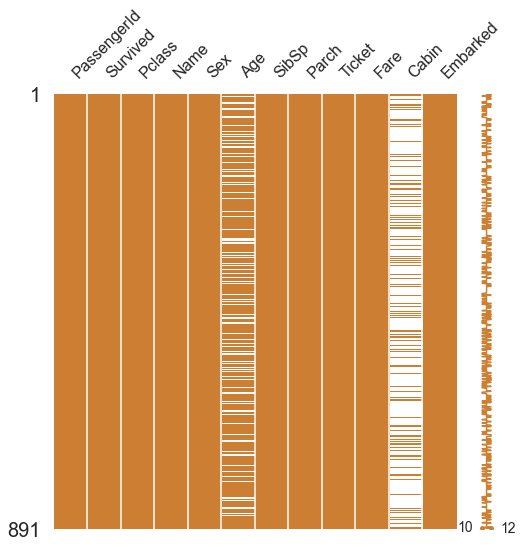

In [43]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

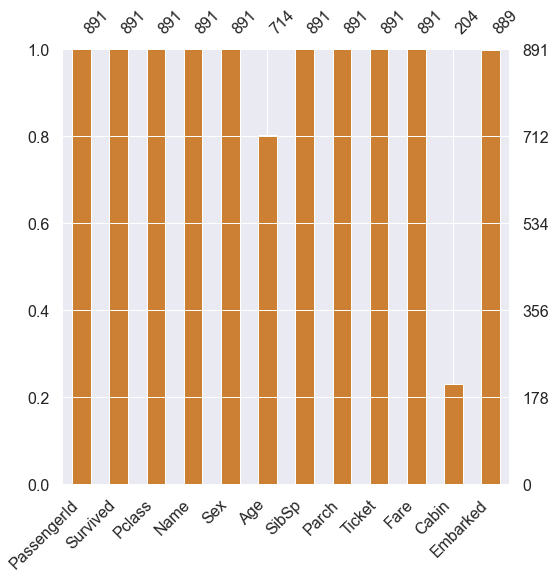

In [44]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

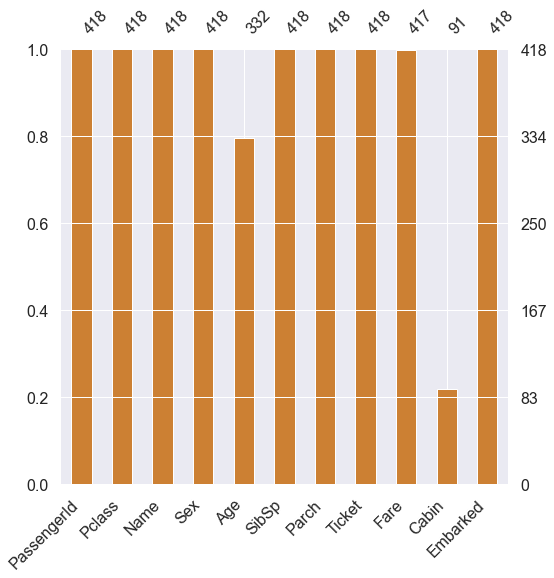

In [45]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## Target label 확인
- target label이 어떤 distirbution을 가지고 있는지 확인해 봐야한다.
- binary classfication 문제의 경우에서, 1과 0의 분포가 어떠하냐에 따라 모델의 평가방법이 달라진다.

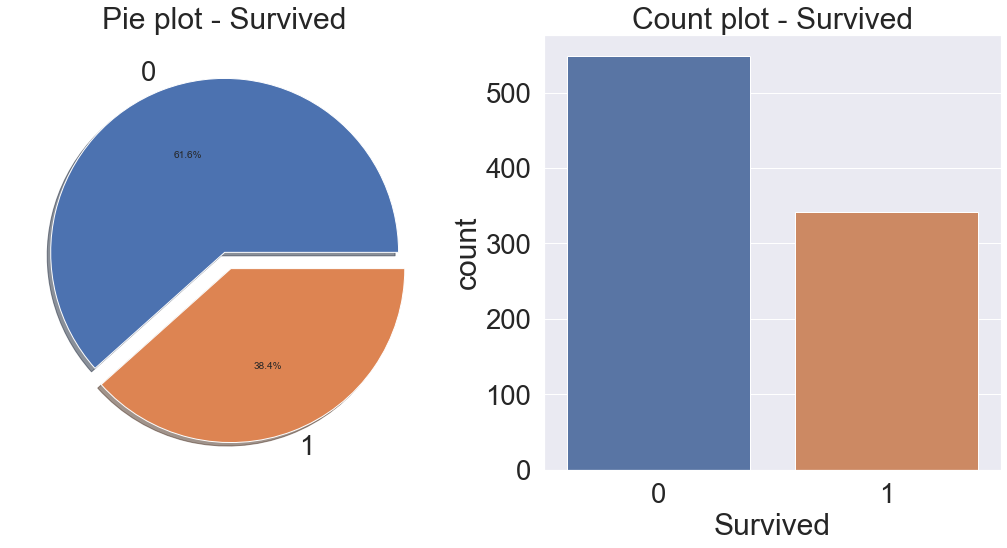

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()



## Exploratory data analysis(EDA)
### 1. Pclass

In [47]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [48]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [49]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.
- ex) class 1이면
# $\frac{80}{80 + 136} \approx 0.63$

<AxesSubplot:xlabel='Pclass'>

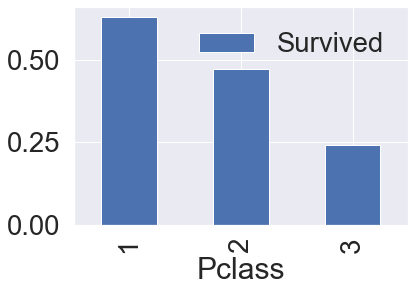

In [50]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by = 'Survived', ascending=False).plot.bar()

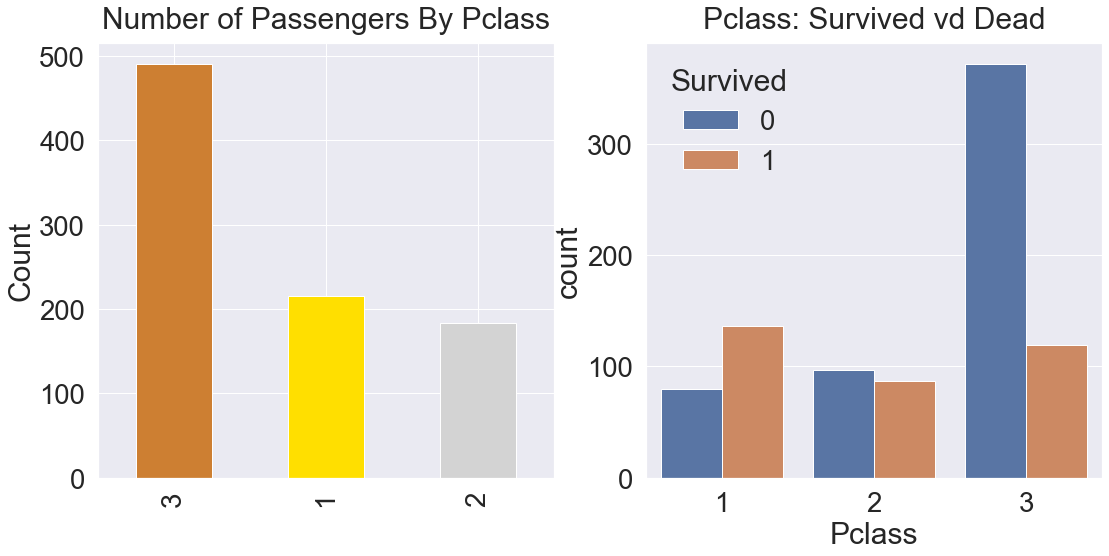

In [51]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vd Dead', y=y_position)
plt.show()

### 2. Sex
- 성별로 생존률이 어떻게 달라지는 지 확인
- pandas groupby와 seaborn countplot을 사용해서 시각화

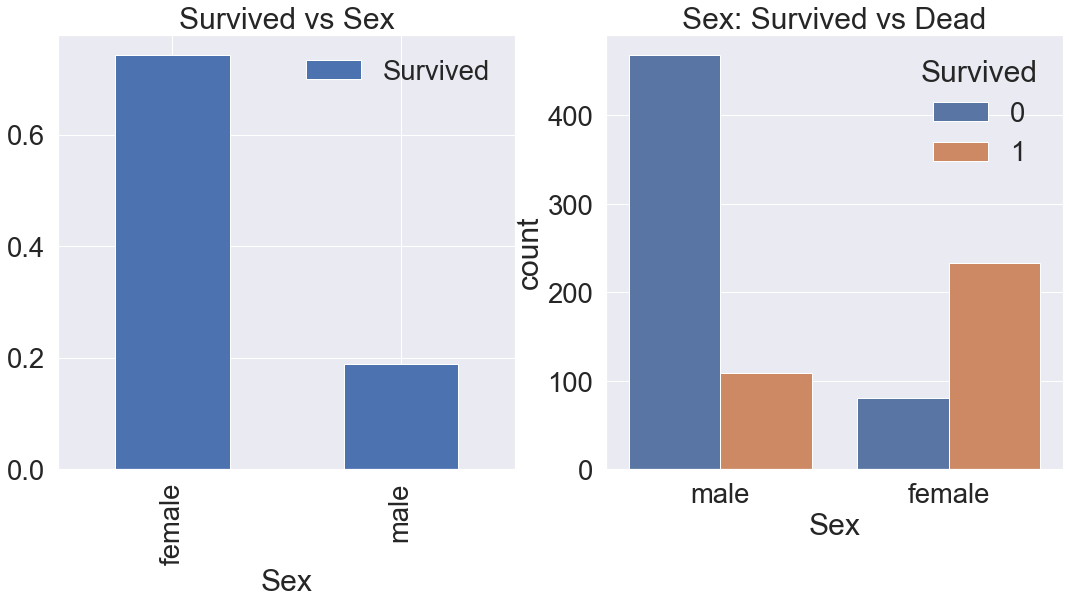

In [52]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [53]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [54]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 3. Both Sex and Pclass
- Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는지 확인
- seaborn의 factorplot을 이용하면, 쉽게 3차원으로 이루어진 그래프를 그릴 수 있음.

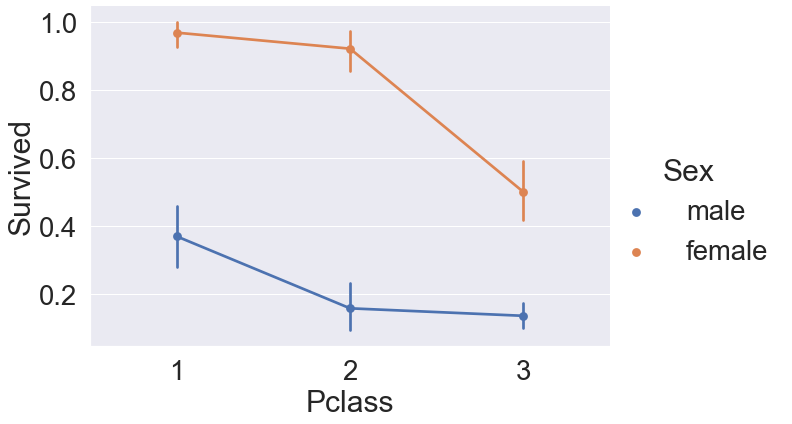

In [55]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

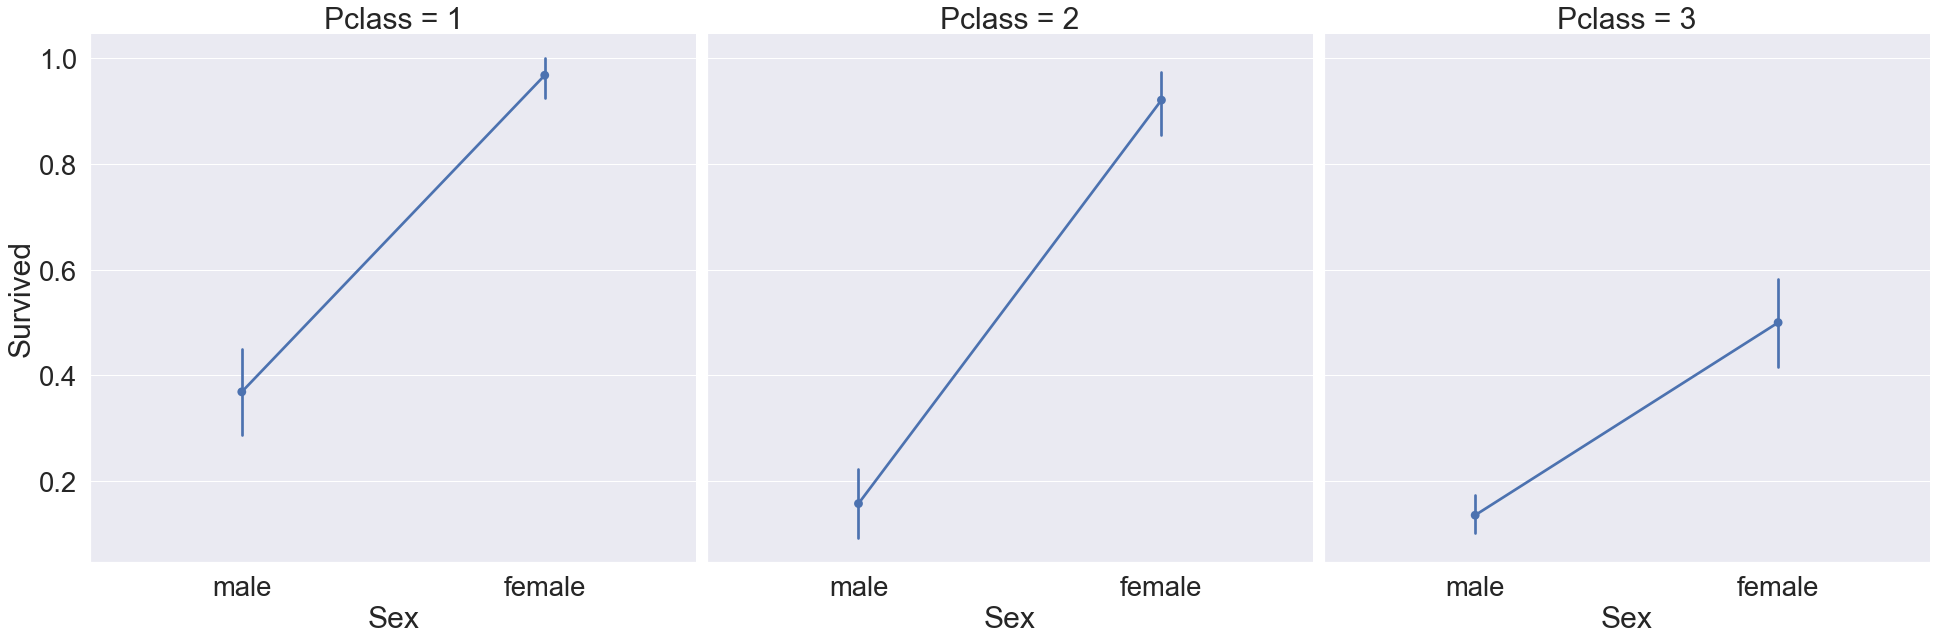

In [56]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 4. Age

In [57]:
print('제일 나이 많은 탑승객 : {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} 세'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} 세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 세
제일 어린 탑승객 : 0.4 세
탑승객 평균 나이 : 29.7 세


- 생존에 따른 Age의 histogram
- Kernel Density Estimatio(KDE) 커널 밀도 추정

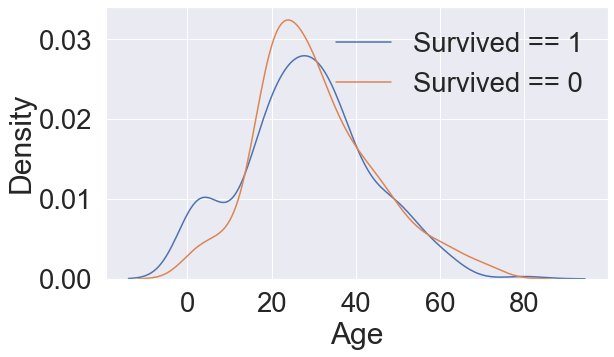

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

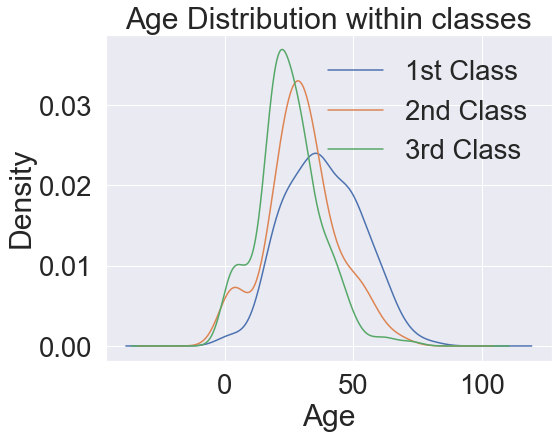

In [59]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

- class가 높을 수록 나이 많은 사람의 비중이 커진다
- 나이대를 변화시키면서 생존률 확인

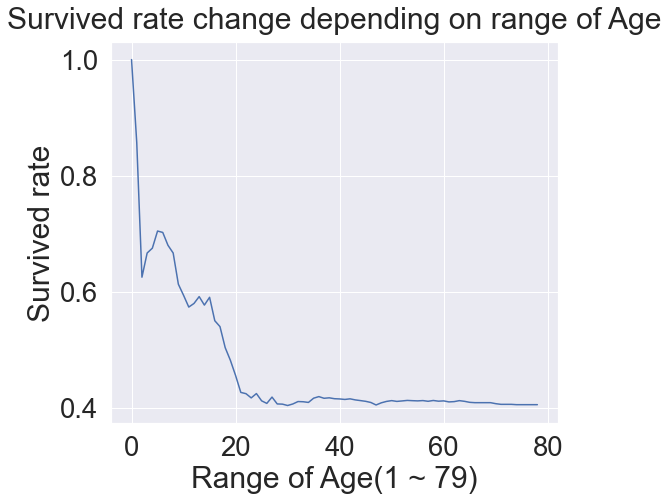

In [60]:
cummulate_survived_ratio = []
for i in range(1, 80):
    cummulate_survived_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(8, 7))
plt.plot(cummulate_survived_ratio)
plt.title('Survived rate change depending on range of Age', y=1.02)
plt.ylabel('Survived rate')
plt.xlabel('Range of Age(1 ~ 79)')
plt.show()

### 5. Pclass, Sex, Age
- 지금 까지 본 Sex, Pclass, Age, Survived 처럼 다수의 컬럼을 쉽게 그려주는 것이
  seborn의 violinplot
- x축은 우리가 나눠서 보고 싶어 하는 case(Pclass, Sex)를 나타내고 y축은 distribution(Age)이다.

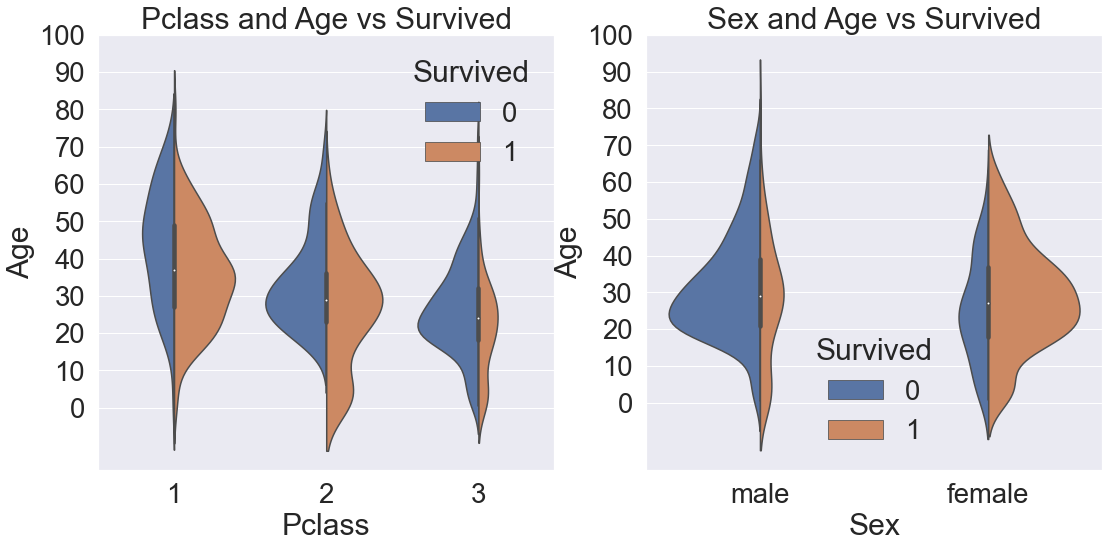

In [61]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 6. Embarked
- 탑승한 곳에 따른 생존률

<AxesSubplot:xlabel='Embarked'>

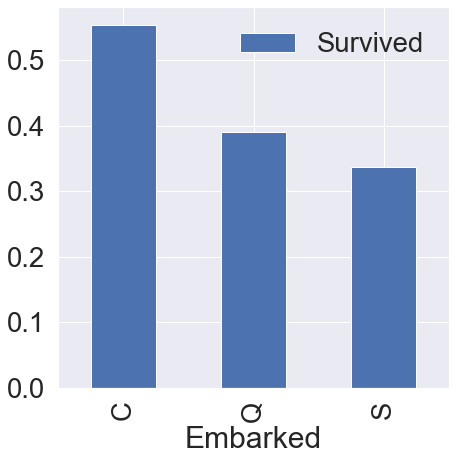

In [62]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True,).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

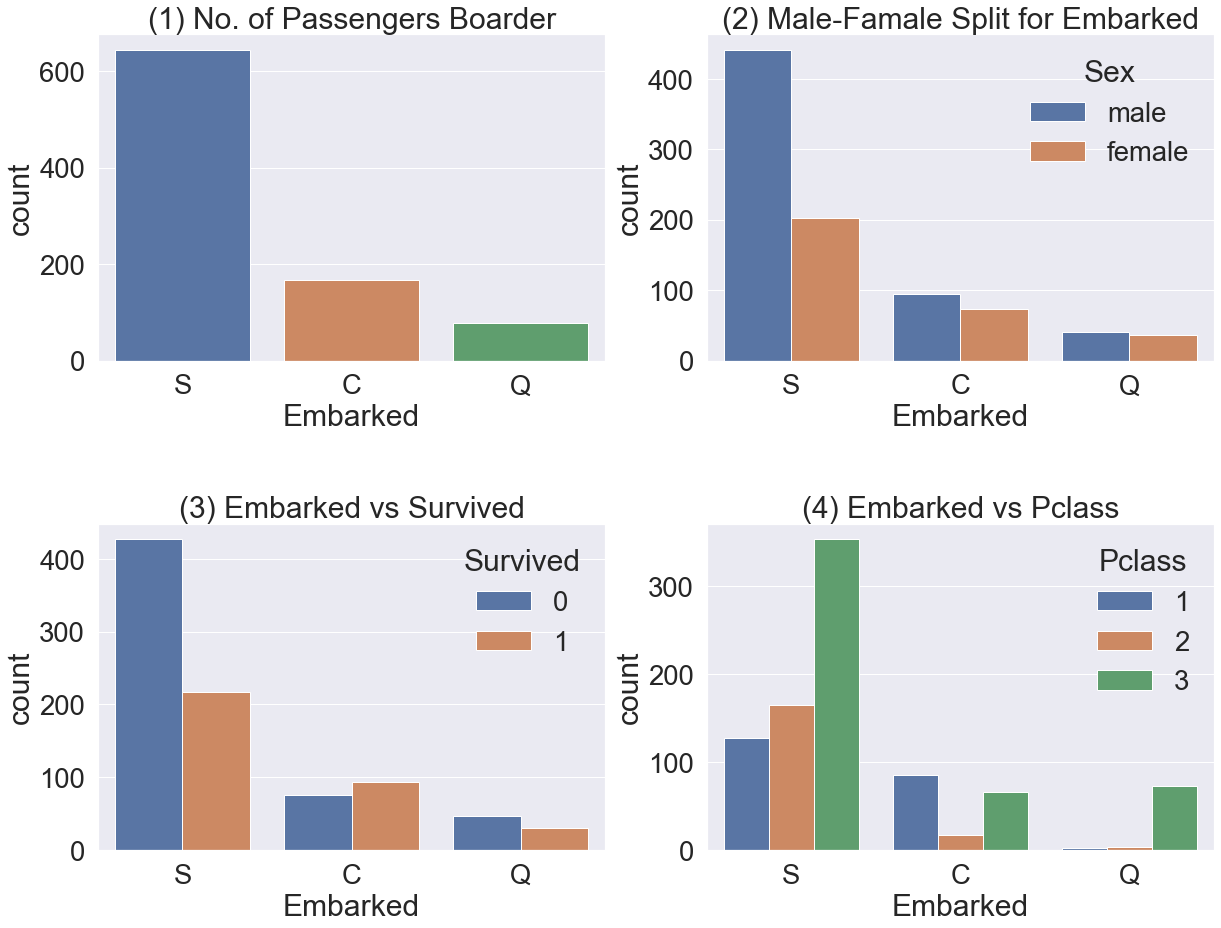

In [63]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarder')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Famale Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - S에서 가장 많은 사람이 탑승.
- Figure(2) - C와 Q는 남녀의 비율이 비슷, S는 남자가 더 많다.
- Figure(3) - 생존확률이 S 경우 많이 낮다.
- Figure(4) - C가 생존확률이 높은 이유는 클래스가 높은 사람이 많이 타서 그렇다.

### 7. Familt - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp + Parch를 합치면 Family가 될 것이다.


In [64]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [65]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


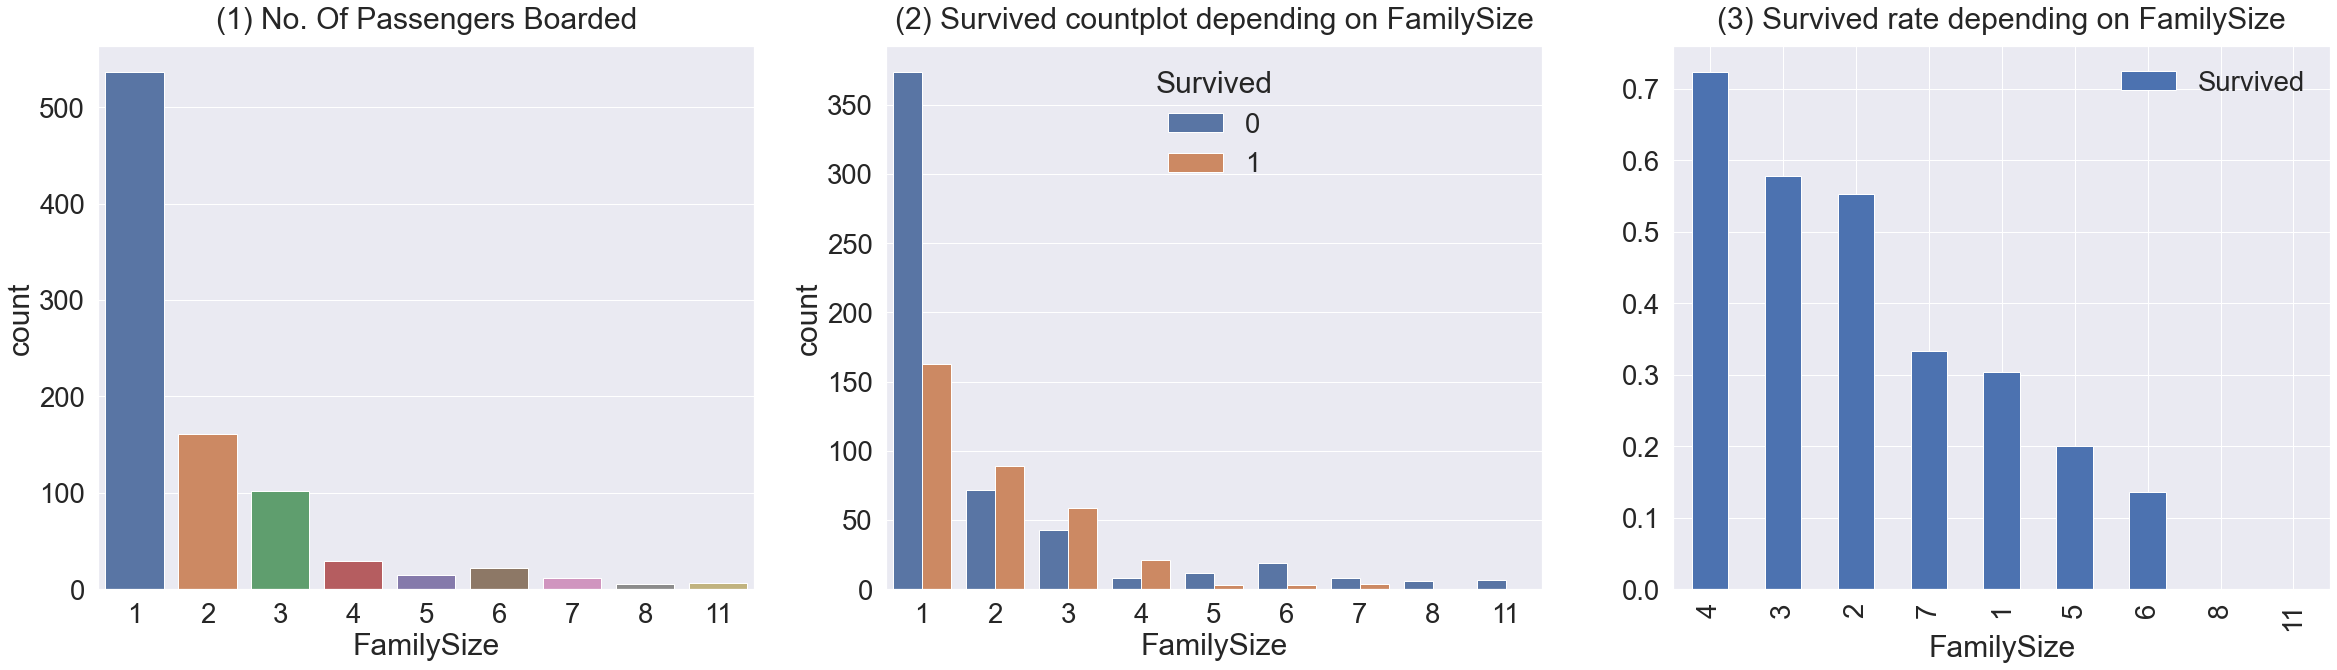

In [66]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',
                                                                                               ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- figure (1) - 가족크기가 1 ~ 11까지 있고, 대부분 1명이고 그다음으로 2, 3, 4명이다.
- figrue (2), (3) - 가족 크기에 따른 생존비교, 가족이 4명인 경우에 생존이 가정 높다, 가족수가 많아질수록 생존확률이 낮아지고, 가족수가 너< 무 적어도 생존률이 낮다. 3 ~ 4명 선에서 생존확률이 높다.

### 8.Fare
- Fare은 탑승요금, contious feature이다.

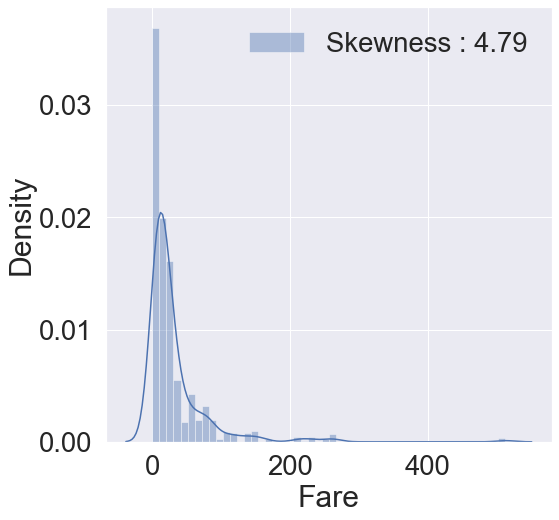

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭 적. 이대로 모델에 넣으면 잘못 학습 될 가능성이 있음
- 몇개 없는 outlier에 대해서 민감하게 반응 한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있음
- outlier의 영향을 줄이기 위해 Fare에 log를 취함

In [68]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

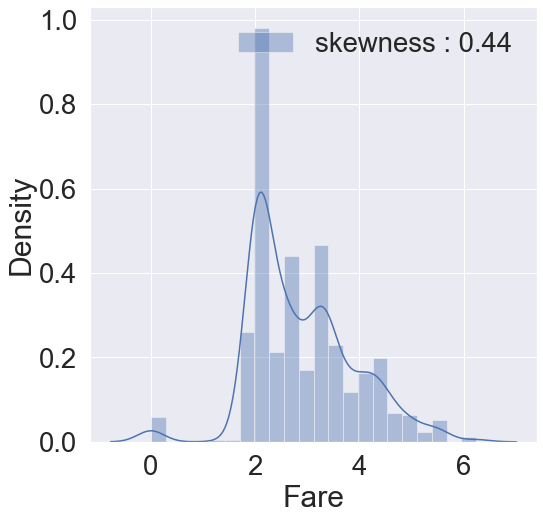

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니 비대칭성이 많이 사라졌다
- 이런 작업을 통해 모델이 좀 더 나은 성능을 내도록 할 수 있다.